<a href="https://colab.research.google.com/github/annaccd/deep_learning_fairness/blob/ACCD/tutorial_fairness_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial Notebook: What is the gender of a data scientist? Addressing bias in Natural Language Processing
## GRAD-E1394 Deep Learning -- Assignment 3
Author(s):
* Angela Duarte Pardo, 214566@students.hertie-school.org
* Anna Clara Deniz, 216496@students.hertie-school.org
* Anna Weronika Matysiak, 217489@students.hertie-school.org
* Francesca Giacco, 211256@students.hertie-school.org
* Helena Bakic, 211553@students.hertie-school.org


In this tutorial, we aim to show a simple and yet effective approach to address bias in natural language processing. It is expected that users of this tutorial will have a better understanding of gender bias in language models and how to minimise this bias with post processing techniques, as well as evaluate bias in a translation task.



# Table of Contents


*   [Memo](#memo)
*   [Overview](#overview)
*   [Background & Prerequisites](#background-and-prereqs)
*   [Software Requirements](#software-requirements)
*   [Data Description](#data-description)
*   [Methodology](#methodology)
*   [Results & Discussion](#results-and-discussion)
*   [References](#references)


<a name="memo"></a>
# Memo




Natural Language Processing (NLP) and language models are more and more used during decision making processes in both the private and public sector. Some examples of decisions delegated to NLP models are CV screenings, websearch, recommendation systems. 

In March 2022  the EU commission released a [guide](https://joinup.ec.europa.eu/sites/default/files/document/2022-03/D02.01_Natural%20Language%20Processing%20for%20Public%20Services_0.pdf) on how to use NLP for public processes.  One tool currently in use is the “[e-translation tool](https://cef-at-service-catalogue.eu/catalogue/search/?q=&selected_facets=service_ownership_status_filter_exact!External)”, which can be used to translate documents in all EU languages. 

Language models are based on a mathematical representation of language, called embeddings. Embeddings are trained by the use of large text data. The issue is that such texts contain stereotypes and biases and therefore the models also learn and propagate these stereotypes. To be concrete, bias means for example that a word such as “programmer” is more likely associated by the model to a man than to a woman. (Bolukbasi et al. 2016). One possible consequence is that women are discriminated against during hiring processes. (Köchling et al., 2020)

Training embeddings requires a lot of computational power and therefore pretrained embeddings such as [GloVe](https://nlp.stanford.edu/projects/glove/) and [Word2Vec](https://towardsdatascience.com/an-introduction-to-word2vec-in-nlp-854e1c288894) are widely used, without any regulation. These however have been shown to discriminate against women and some ethnical groups. (Petreski and  Hashim, 2022) 

There are several pieces of research showing that biased embeddings are problematic (May et. al 2019), backed by research arguing that language shapes society and the perception of roles (Leavy, 2018). ref Therefore it is crucial that language models do not propagate stereotypes. Governments are aware of the problem of bias in NLP. For example the Federal Anti-discrimination agency Germany sponsored a [study](https://www.antidiskriminierungsstelle.de/EN/homepage/_documents/download_diskr_risiken_verwendung_von_algorithmen.pdf?__blob=publicationFile&v=1) on the risk of discrimination using AI. What however seems to miss is tools to solve the problem. 

With our tutorial we will first demonstrate that embeddings are biased. Later, we will show how to debias the embeddings and how the output looks like after the debiasing process. Lastly, we will perform a translation task to show concretely the effect of debiasing.

<a name="overview"></a>
# Overview


This tutorial is specifically addressing the problem of gender bias in a language model that is used to perform a translation task. The approach used to minimise the gender bias is a post processing technique that debias the word embeddings that are then applied to the model. The tutorial then evaluates the performance of such an approach by comparing bias in a translation task, before and after the debias of the word embeddings.

<a name="background-and-prereqs"></a>
# Background & Prerequisites


Apart from the technical background knowledge of python programming and basic knowledge of deep learning and neural networks, it is required that users of this tutorial have some understanding of word embeddings, language models, machine translation and bias. 

> Word Embeddings

Word embeddings are a way of representing words as vectors, or numerical arrays, in a way that captures the meaning of the words. This is useful in language translation because it allows computers to understand the meaning of words in a sentence and how they relate to each other. 

They learn from large amounts of text data using a technique called neural network-based learning. This allows the word vectors to be adjusted and fine-tuned based on the relationships between words in the text data.

> Language models

Language models are a type of machine learning model that is trained to predict the next word in a sequence of words. This is useful in a variety of natural language processing tasks, such as language translation.

They are typically trained using a technique called neural network-based learning, which involves feeding the model a large amount of text data and adjusting the model's internal parameters, or weights, to minimise the error in its predictions. The model learns to make predictions based on the patterns and relationships it detects in the text data.

Once the model is trained, it can be used to generate text by feeding it a starting sequence of words and letting it predict the next word in the sequence. The model can then use its own predictions as input to generate the next word, and so on.

> Machine translation

Machine translation is a technology that allows computers to automatically translate text from one language to another. 

It works by using algorithms that are trained on large amounts of text data in both languages, so that they can learn the patterns and relationships between the words and sentences in each language.

Once the algorithm is trained, it can be used to translate new text by taking a sentence in one language as input and outputting a translation of the sentence in the other language. 

> Bias

Bias in language models refers to the systematic favouring of certain groups or individuals over others in the algorithms, data sets, and processes used in these models. 

Bias can arise from various sources, including the data sets used to train the algorithms, the algorithms themselves, and the ways in which the algorithms are applied. For example, if a language model is trained on a data set that is not representative of the full diversity of the population, it may produce biassed results when applied to other data sets.

The impact of bias in natural language processing and language models can be far-reaching, as these models are used in a variety of tasks, such as language translation, speech recognition, and text generation. If a language model is biased, it may produce unfair or discriminatory results in these tasks, which can have negative consequences for the individuals affected.


## Videos

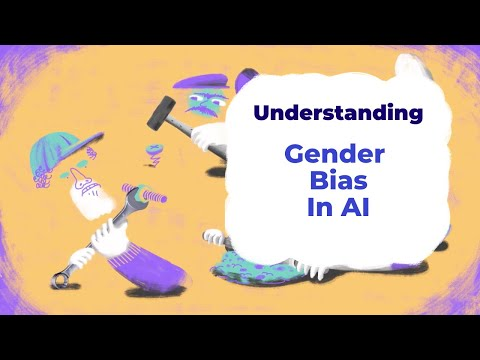

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('qpYyI9Tdtc4')

## Reading materials
[Neural Network Embeddings Explained | by Will Koehrsen | Towards Data Science](https://towardsdatascience.com/neural-network-embeddings-explained-4d028e6f0526)

[What does “fairness” mean for machine learning systems?](https://haas.berkeley.edu/wp-content/uploads/What-is-fairness_-EGAL2.pdf)

[Gender Bias in Neural Machine Translation](https://www.cis.upenn.edu/wp-content/uploads/2021/10/Senior_Thesis_Yuxin_Liao.pdf)



<a name="software-requirements"></a>
# Software Requirements

Include in this section the software requirements, setup instructions, and library imports. 

Example:

This notebook requires Python >= 3.7. The following libraries are required:
*   pandas
*   numpy
*   matplotlib

In [ ]:
!pip install pandas numpy matplotlib 

In [ ]:
# Data visualization
import matplotlib.pyplot as plt 

# Data manipulation
import pandas as pd
import numpy as np

<a name="data-description"></a>
# Data Description
 

In this section, kindly provide a brief description of the dataset that you will use in this tutorial. Specify information such as the data type or file format (e.g. text, image, video, tabular), size, spatial resolution, temporal resolution, labels or categories, etc. Explicitly name the source of your dataset. If you are introducing a new dataset, feel free to include additional information (e.g. field survey sampling methods, dataset annotation efforts, etc.) or provide external links and resources that discuss the specific details of the dataset.

## Data Download
Provide instructions on how to retrieve the necessary data. 

This may include bash scripts, Python scripts, or other means of downloading the data.

In [ ]:
# Insert data download code here, e.g.
# !wget <data-download-link>.zip -O data.zip

## Data Preprocessing
Additionally, you can include any data preprocessing steps and exploratory data analyses (e.g. visualize data distributions, impute missing values, etc.) in this section to allow the users to better understand the dataset. 

In this section, you might also want to describe the different input and output variables, the train/val/test splits, and any data transformations.

In [ ]:
# Insert data pre-processing and exploratory data analysis
# code here. Feel free to break this up into several code
# cells, interleaved with explanatory text. 

<a name="methodology"></a>
# Methodology

Gender Bias can happen at various stages of model development, as we explained before. However, bias occurring in embeddings can then get amplified by models.

In this section, we'll walk our readers step-by-step through three processes:

*   Quantifying gender bias and debiasing pretrained GloVe embeddings.
*   Implementing a 2-layered LSTM tranlation model with pretrained and debiased GloVe embeddings.
*   Comparing the performance of our biased and debiased translation models in stereotypical vs non-stereotypical scenarios.

Let's start with understanding how does bias occur in embeddings.

## Debiasing embeddings
Embeddings are vector representation of words that encode their relations with other words in a given corpus. Because they are often trained with internet data, they can also encode societal bias in their representation.

How does this bias look like? Well, similar words occur in similar contexts, which means that the embeddings can group together words that in society has traditionally –though erroneously– grouped together, as for example: men, computers, football and programmers; and women with homemaker, nanny and teachers. 

This was exactly the case in the paper "Man is to computer programmer as woman is to homemaker? debiasing word embeddings." by Bolukbasy et al. (2016). The authors studied bias in embeddings by programming analogies: "he is to king as she is to x", and found that the algorithms were consistently picking professions stereotypically associated to women (homemaker, nurse,etc), even when the male professions were neutral. They therefore propose a debiasing method for the embeddings, so that the representation of neutral words such as  "doctor", "teacher", "manager" gets neutralized and stops being associated to any gender. 

Our implementation of the debiasing algorithm is based on the paper by Wang, et al. (2019), "Double-Hard Debiasing: Tailoring Word-Embeddings for Gender Bias Mitigation", where the authors improve the approach by Bolukbasy et al. by also tackling the fact that frequencies of words within texts can also determine closeness to other words and can add noise to the gender component. It is worth noting that this algorithm is a "hard-debiasing" algorithm, which means that the gender component of the embeddings is removed completely. Other –softer– methods isolate it without removing it, to access it in case of need. 

In the following section, we'll explain each step of the Double-Hard Debiasing algorithm as developed by Wang. et al. We also use the implementation by Hassiah (2018) as inspiration. 

### Dependencies

As always, let's first start by downloading and importing the necessary dependencies. 

In [1]:
!pip install matplotlib numpy scikit-learn scipy tqdm
!pip install  gensim==4.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 5.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
#importing the necessary packages
import codecs
import json
import operator
from typing import Dict, List, Tuple, Union
import numpy as np
import scipy
import tqdm

%load_ext autoreload
%autoreload 2

Since the algorithm can be computationally intensive, it is good to have GPU access. It can also run in CPU, though.

In [3]:
import torch
# Checks whether GPU is enabled
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))

# Gets a specific GPU model
if str(device) == "cuda:0":
  print("GPU: {}".format(torch.cuda.get_device_name(0)))

Device: cpu


We also mount the Google Drive folder where all the code, models and files are hosted. 

In [4]:
#Mounting the drive where all the necessary files are.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Preparation procedures: 


*   Preprocessing the embeddings
*   Getting gendered vocabulary and excluding it from the embeddings
*   Getting the gendered-pairs for the gender direction
*   Getting the necessary functions to compute the bias of a word. 

#### Getting and preprocessing Glove Embeddings 

Nowadays it is easy to access different pretrained GloVe 300-dimensional embeddings. The *Double-Hard debiasing algorithm* needs to process them in such a way that we can access both words and vectors without losing other important information represented in the embeddings. To do so, we will use data structures such as lists and dictionaries to get the vocabulary, vectors and indices stored in the emdeddings. 

Let's start at the beginning: 

We use Gensim to get the 300-dimensional embeddings trained on Wikipedia. 

In [5]:
#Downloading the glove embeddings from gensim
import gensim.downloader
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.keyedvectors import KeyedVectors

glove_model = gensim.downloader.load('glove-wiki-gigaword-300')
# Stores the weigths on a separate variable
glove_weights = torch.FloatTensor(glove_model.vectors)

[==================================================] 100.0% 376.1/376.1MB downloaded


From the gensim model object that we created with the embeddings, we get the vocabulary (as a list), the vectors (list of arrays) and the words with their respective indices (dictionary, word: index).

In [6]:
#Getting the vocabulary list, array of vectors per word and indices (word2idx)
vocab=glove_model.index_to_key #list
vectors=glove_model.vectors #list of arrays
word2idx = {word: idx for idx, word in enumerate(vocab)} #dictionary: word, index
print(f"vectors shape: {vectors.shape}, word2idx length: {len(word2idx)}, vocab length: {len(vocab)}")


vectors shape: (400000, 300), word2idx length: 400000, vocab length: 400000


We also create a dictionary word-vector, so that we can more easily access the vector corresponding to each word.

In [7]:
#Creating a dictionary to access the embeddings with word as key and vectors as values
dict_glove = dict({})
for idx, key in enumerate(glove_model.key_to_index):
    dict_glove[key] = glove_model[key]

#### Loading female and male biased vocabulary
Following [Wang et al.'s](https://github.com/uvavision/Double-Hard-Debias/blob/master/GloVe_Debias.ipynb) implementation of Double-Hard Debias algorithm, we upload some gender-specific words. We use here the original files that the authors use and thank them for making the files public. 

In [8]:
# Getting female and male biased vocabulary from Wang et al.'s datafiles. 
# Creating a list of gender_specific words.

with open('/content/drive/MyDrive/Deep Learning/dataDoubleHard/male_word_file.txt') as f:
    gender_specific = [line.strip() for line in f]

with open('/content/drive/MyDrive/Deep Learning/dataDoubleHard/female_word_file.txt') as f:
    for l in f:
        gender_specific.append(l.strip())

with codecs.open('/content/drive/MyDrive/Deep Learning/dataDoubleHard/gender_specific_full.json') as f:
    gender_specific.extend(json.load(f))

#### Excluding the gender specific words from the vocabulary
With this we hope to get the neutral words. This follows the approach of Bolukbasy et al. where all words that are not specifically gendered should be neutral, and not lean towards any side of the gender-continuum. 

In what follows we adapt the functions of Wang et al. to our use case, using a functional rather than object-oriented approach. 

In [9]:
## Definition of functions that identify characters in the embeddings (digit-words, puntuation marks, etc)
from tqdm import tqdm
import string 

#Identifies punctuation
def has_punct(w):
    """
    Determines whether a word has punctuation marks

    """
    if any([c in string.punctuation for c in w]):
        return True
    return False

#Identifies digits from the embeddings
def has_digit(w):
    """
    Determines whether a word has any digits

    """
    if any([c in '0123456789' for c in w]):
        return True
    return False

## Removes gendered words from the vocabulary 
## With this, we obtain a limited_vocabulary that has only the non-gendered words. 
## The function was used in the original paper only limited the first 50000 words from the vocabulary, we removed the 
## gendered words from all the words in the embeddings 
def limit_vocab(word_vector, word_index, vocab, exclude = None):
    """
    Limits the vocabulary by excluding specific words that are taken as parameters.
    Returns the limited vectors, vocabulary and word indexes dictionary.

    """
    vocab_limited = []
    # Ignores words with punctiations, digits, hyphens, etc. 
    for word in tqdm(vocab[:400000]): 
        if word.lower() != word :
            continue
        if len(word) >= 20: 
            continue
        if has_digit(word) | has_punct(word): 
            continue
        if '_' in word:
            p = [has_punct(subw) for subw in word.split('_')]
            if not any(p):
                vocab_limited.append(word)
            continue
        vocab_limited.append(word)
    
    #Excludes the words that are received as parameters
    if exclude:
        vocab_limited = list(set(vocab_limited) - set(exclude))
    
    print("Size of limited vocabulary:", len(vocab_limited))
    
    # Finds the vectors corresponding to the limited vocabulary
    wordvectors_limited = np.zeros((len(vocab_limited), len(word_vector[0, :])))
    for index,word in enumerate(vocab_limited):
        wordvectors_limited[index,:] = word_vector[word_index[word],:]
    #Creates a word to index dictionary of the limited vocabulary
    w2i_limited = {word: index for index, word in enumerate(vocab_limited)}
    
    return vocab_limited, wordvectors_limited, w2i_limited

In [10]:
# Using the function to remove gendered words from the embeddings.
vocab_limited, vectors_limited, word2idx_limited = limit_vocab(vectors, word2idx, vocab, exclude = gender_specific)

100%|██████████| 400000/400000 [00:01<00:00, 243462.80it/s]


Size of limited vocabulary: 326614


#### Getting gendered pairs to calculate the gender direction

These pairs were used in the Bolukbasy paper to calculate the gender direction of English embeddings. We use them in the same format as the authors did. 

In [11]:
#Getting the gendered pairs to calculate afterwards the gender direction 
gendered_pairs = [
    ['she', 'he'], ['herself', 'himself'], ['her', 'his'], ['daughter', 'son'], ['girl', 'boy'], ['mother', 'father'], 
    ['woman', 'man'], ['mary', 'john'], ['gal', 'guy'], ['female', 'male']]

# Turning the pairs into a list of words for validation purposes.
gendered_words=[]
for pair in gendered_pairs: 
  for word in pair: 
    gendered_words.append(word)

#### Functions to compute gender bias of a word

##### Cosine similarity.
As we studied in class, cosine similarity measures how close or similar two vectors are. Vectors are similar when the angle between them is close to 0 (and therefore the cosine value is close to 1).

In [12]:
from numpy.linalg import norm

#Function to measure the similarity between to vectors.
def cosine_similarity(vector_1, vector_2):
    """
    Calculates cosine similarity of two vectors. 
    Cosine Similarity measures the similarity of two word vectors. 
        Ie. vectors are similar when the angle between them is close to 0 (cosine close to 1).

    """
    dot_product=np.dot(vector_1,vector_2)
    norm_product=np.linalg.norm(vector_1)*np.linalg.norm(vector_2)
    cosine_similarity = dot_product/norm_product
    
    return cosine_similarity

In [13]:
#Validation with specific examples. 
print("cosine similarity of pretty, pretty: ", cosine_similarity(dict_glove["pretty"], dict_glove["pretty"]))
print("cosine similarity of mother, father: ", cosine_similarity(dict_glove["mother"], dict_glove["father"]))
print("cosine similarity of tall, short: ", cosine_similarity(dict_glove["tall"], dict_glove["short"]))

cosine similarity of pretty, pretty:  1.0
cosine similarity of mother, father:  0.7568217
cosine similarity of tall, short:  0.32517698


##### Computing the bias of a word
Gender bias of a word can be calculated as a substraction: the word's similarity to `he` word embedding "minus" the word's similarity to `she` word embedding. With this we get the following measures of bias: 
- if the word has no bias (gender neutral words) then its gender bias would be zero. 
- If it is more masculine, then its gender bias would be positive
- If it is more feminine, then its gender bias would be negative

The following function calculates the bias of a word: 

In [14]:
# Function to compute the gender bias of a word. 
def compute_bias(word_vector, index, vocabulary, he_embedding, she_embedding):
    """
    Compute the gender bias of each word as the difference between the cosine similarities with the "he" and "she" embeddings
    Outputs a dictionary with words as keys and gender bias as values
    """
    gender_bias = {}
    for word in vocabulary:
        vector = word_vector[index[word]]
        gender_bias[word] = cosine_similarity(vector, he_embedding) - cosine_similarity(vector, she_embedding)
    return gender_bias

In [15]:
# To compute the gender bias, we need to get the embeddings of "he" and "she"
he_embed = vectors[word2idx['he']]
she_embed = vectors[word2idx['she']]

# Using the gender bias function to compute the bias of all the words in the limited dataset (which contains the words that are supposed to be neutral)
#We create a dictionary with the word as key and the bias as value
gender_bias_original = compute_bias(vectors_limited,word2idx_limited, vocab_limited, he_embed, she_embed)

In [16]:
#Testing the gender-bias algorithm on a few words. 
#Thanks to @jmyao17 for the base list, which we augmented and validated on this exercise.
print('Other words and their similarities:')
words= ['lipstick', 'guns', 'science', 'arts', 'literature', 'warrior','doctor', 'tree', 'receptionist', 
             'technology',  'fashion', 'teacher', 'engineer', 'pilot', 'computer', 'singer', 'manager', 'homemaker']
count=0
for word in words:
  if word not in gendered_words:
    print(f"Score for '{word}' in original embeddings:", gender_bias_original[word])
    count+=1


Other words and their similarities:
Score for 'lipstick' in original embeddings: -0.20701732364065234
Score for 'guns' in original embeddings: -0.007202808085716217
Score for 'science' in original embeddings: 0.05747010930959373
Score for 'arts' in original embeddings: -0.002059538248545767
Score for 'literature' in original embeddings: 0.005329373681541294
Score for 'warrior' in original embeddings: -0.054117263222540665
Score for 'doctor' in original embeddings: -0.0038349633118061055
Score for 'tree' in original embeddings: -0.03015877756800217
Score for 'receptionist' in original embeddings: -0.1694939112720635
Score for 'technology' in original embeddings: 0.09054202441188455
Score for 'fashion' in original embeddings: -0.14799247344754451
Score for 'teacher' in original embeddings: -0.04303611885177494
Score for 'engineer' in original embeddings: 0.1435491729142003
Score for 'pilot' in original embeddings: 0.04254437336120695
Score for 'computer' in original embeddings: 0.0575804

There are some words, such as: "lipstick", "homemaker" and "receptionist", that are more feminine than "technology", "engineer", "manager", following western societal biases. Interestingly enough, "tree" and "warrior" and  seem to be more "feminine", while "doctor","guns","literature","arts" appear to be very close to zero. 

### Hard Debiasing of GloVe embeddings
We use the Double-Hard debiasing algorithm proposed by Wang et al. in 2020. It is an improvement of the Hard-Debiasing algorithm proposed in Homemaker paper by Bolukbasy et al. Besides applying post-processing procedures to remove the gender ‘direction’ of the embeddings, this algorithm also takes care of word-frequencies that can act as harmful noise, preventing the algorithm from correctly identifying the “gender direction”.

In the following four sections we define the functions that will be used to debias the embeddings. 


#### Identifying the 'gender direction' or 'gender subspace' in the embeddings
To find the direction of the gender subspace, we use PCA. This methods allows us to get where the majority of of the variation of the gendered pairs happened. This direction will be our "gender subspace".

In [17]:
from sklearn.decomposition import PCA

# Performs PCA to identify the principal components of gendered words
def perform_PCA_gender_pairs(gender_pairs, word_vectors, word2index):
    """
    Performs PCA on the difference of gendered word vectors in a pair.

    """ 
    vector_matrix = []
    count = 0
    
    if type(gender_pairs[0]) is list: #If input is list
        
        for feminine_word, masculine_word in gender_pairs:
            #Ignoring words that are not in the embeddings.
            if not (feminine_word in word2index and masculine_word in word2index): 
              continue

            #Centering the gendered-vectors
            center = (word_vectors[word2index[feminine_word], :] + word_vectors[word2index[masculine_word], :])/2
            vector_matrix.append(word_vectors[word2index[feminine_word], :] - center)
            vector_matrix.append(word_vectors[word2index[masculine_word], :] - center)
            count += 1
            
    else:#if input not a list, append the word to the vector matrix.
        for word in gender_pairs:
            if not (word in word2index):
               continue
            vector_matrix.append(word_vectors[word2index[word], :])
            count += 1
        
        embeddings = np.array(vector_matrix)
        vectors_mean = np.mean(np.array(embeddings), axis=0)
        wv_hat = np.zeros(embeddings.shape).astype(float)
        #Mean-correcting the gendered pairs to calculate PCA with the covariance matrix.
        for i in range(len(embeddings)):
            wv_hat[i, :] = embeddings[i, :] - vectors_mean
        vector_matrix = wv_hat

    #Performs PCA on the gendered-matrix to find the gender direction        
    matrix = np.array(vector_matrix)
    pca = PCA()
    pca.fit(matrix)
    print('pairs used in PCA: ', count)
    return pca


In [18]:
#Use the PCA function to find the gender directions of the gendered pairs
def find_gender_direction(gender_pairs, word_vectors, word2index_partial): 
  """
  Uses PCA to find the gender directions of the gendered pair vectors in the space.

  """
  gender_directions = list()
  for gender_word_list in [gender_pairs]:
      gender_directions.append(perform_PCA_gender_pairs(gender_word_list, word_vectors, word2index_partial).components_[0])
  return gender_directions

#### Neutralizing gender words
After finding the gendered direction, we need to remove the projection of neutral words in the gender subspace. After doing this, we get ortoghonal vectors to the gender subspace that are neutralized because they are no longer leaning towards the gender direction. 

In [19]:
#Remove vector projections
def remove_vector_projection(vector1, vector2):
   """
   Removes the projection of vector 1 on vector 2

   """
   difference = vector1 - vector2 * vector1.dot(vector2) / vector2.dot(vector2)
   return difference

In [20]:
#Remove the gender component through the removing vector projection function.
def remove_gender_component(vocab_partial, vectors, w2i_partial, gender_directions): 
    """
    Removes the gender projection of the vectors to neutralize them

    """
    debiased_vectors = np.zeros((len(vocab_partial), len(vectors[0, :]))).astype(float)
    for i, w in enumerate(vocab_partial):
        u = vectors[w2i_partial[w], :]
        for gender_direction in gender_directions:
            u = remove_vector_projection(u, gender_direction)
            debiased_vectors[w2i_partial[w], :] = u
    return debiased_vectors

#### Finding frequency direction

Wang et al.s' contribution to embedding debiasing is concentrated on the fact that higher frequencies of words can influence how close they are to the gendered pairs: if computer and men are talked about more often, it is likely that they get closely in the embeddings. So according to Wang et al., if we don't take care of the frequency features, our debiasing algorithms might not get the gender direction right and might then have limited efficiency. 

The following functions find and remove the frequency features by also performing PCA but this time on all the vectors in the embeddings. 

In [21]:
from sklearn.decomposition import PCA

# get main PCA components on descentralized word embeddings
def get_main_pca_all(word_vectors):
    """
    performs PCA on all vectors received as parameters

    """
    #Mean-correcting the gendered pairs to calculate PCA with the covariance matrix.
    word_vectors_mean = np.mean(np.array(word_vectors), axis=0)
    word_vectors_hat = np.zeros(word_vectors.shape).astype(float)

    for i in range(len(word_vectors)):
        word_vectors_hat[i, :] = word_vectors[i, :] - word_vectors_mean

    main_pca = PCA()
    main_pca.fit(word_vectors_hat)
    
    return main_pca


In [22]:
#Function to remove the frequency features. We obtain a new version of embeddings without the frequency component.
def remove_frequency_features(vocab_partial, word_vectors, word2index, word2index_partial, component_ids): 
  """
  Removes frequency features by substracting the projection on the most frequent words space

  """
  components=[]
  for i in component_ids:
    components.append(main_pca.components_[i])
  
  word_vec_frequency = np.zeros((len(vocab_partial), word_vectors.shape[1])).astype(float)
  
  for i, word in enumerate(vocab_partial):
    vector = word_vectors[word2index[word],:]
    proj = np.zeros(vector.shape).astype(float)
        # removes the component of vector in the direction of principal_component
    for principal_component in components:
        proj += np.dot(np.dot(np.transpose(principal_component), vector), principal_component)
    word_vec_frequency[word2index_partial[word], :] = word_vectors[word2index[word], :] - proj -vectors_mean
                                                                                                                                                                                                                                                                                                                                                   
  return word_vec_frequency

#### Double-Hard debiasing function

Following Wang et al., we remove the frequency features from the embeddings before neutralizing them by removing the gender projection. 

In [23]:
#Hard debiasing function
def hard_debias(wv, w2i, w2i_partial, vocab_partial, component_ids):
    """
    Function that performs the Double-Hard debiasing. It does this in three steps: 
    1. Removing the frequency features
    2. Identifying the gendered directions
    3. Removing the gender component from the embeddings. 

    """
    # get rid of frequency features
    wv_f= remove_frequency_features(vocab_partial, wv, w2i, w2i_partial, component_ids)
        
    # debiasing: 
    # 1. finding the gender direction
    gender_directions=find_gender_direction(gendered_pairs, wv_f, w2i_partial)
    # 2. Removing the gender projection. 
    wv_debiased=remove_gender_component(vocab_partial, wv_f, w2i_partial, gender_directions) 
        
    return wv_debiased

##### Find the optimal frequency direction
Finally, to he able to use the double-hard debiasing algorithm, we need to find the optimal direction for the debiasing. This is done by performing K-Mean clustering and finding the allignment that is closer to the ground truth (as provided by the female and male words uploaded at the beginning).

In [24]:
#Gets embeddings
def extract_vectors(words, word_vectors, word2index):
    """
    Gets the GloVe vectors of the words passed as parameter.

    """
    X = [word_vectors[word2index[x],:] for x in words]
    
    return X


In [25]:
from sklearn.cluster import KMeans
#evaluates embeddings with respect to ground truth
def cluster_and_evaluate(words, X, random_state, y_true, num=2):
    """
    Uses the K-Means algorithm to cluster selected words and computing the alignment between them and the ground truth

    """
    kmeans = KMeans(n_clusters=num, random_state=random_state).fit(X)
    y_pred = kmeans.predict(X)
    correct = [1 if item1 == item2 else 0 for (item1,item2) in zip(y_true, y_pred) ]
    alignment = sum(correct)/float(len(correct))
    max_alignment = max(alignment, 1 - alignment)
   
    print(f'Alignment: {max_alignment}')
    
    return kmeans, y_pred, X, max_alignment


In [26]:
#Function to get the optimal debiasing direction
def getting_optimal_direction(vectors, word2idx, w2i_partial, vocab_partial, male_words, female_words):
  """
  Determine the optimal frequency alignment for the debiasing: 
  A value close to 1 indicates stronger bias, whereas a value close to 0.5 indicates perfect debiasing. 

  """
  alignments = []

  for component_id in range(20):
      print(f'Component: {component_id}', end=', ')
      wv_debiased = hard_debias(vectors, word2idx, w2i_partial, vocab_partial, component_ids = [component_id])
      _, _, _, alignment = cluster_and_evaluate(male_words + female_words, 
                                           extract_vectors(male_words + female_words, wv_debiased, w2i_partial), 1, y_true)
      alignments.append(alignment)
   
  optimal_frequency_direction = alignments.index(min(alignments))
  return alignments, optimal_frequency_direction

### Finally! Putting everything together: Using the Double-Hard Debiasing algorithm

So we are going to use of the functions defined above to find the optimal direction for debiasing (i.e. the most gender-neutral direction) after removing the frequency features from our embeddings.

In [27]:
#Find the main principal components of all vectors for the frequency features removal
main_pca = get_main_pca_all(vectors)
vectors_mean = np.mean(np.array(vectors), axis=0)


In [28]:
#Getting the gendered words ready to get the ground truth and the optimal direction for debiasing
# Sorting gender_bias_original in the ascending order so that all the female biased words will be at the start and
# all the male biased words will be at the end.
biased_words_sorted = sorted(gender_bias_original.items(), key=operator.itemgetter(1))

# We take 1000 male and 1000 female biased words, following Hassiakh's approach
size = 1000
female_words = [word for word, bias in biased_words_sorted[:size]]
male_words = [word for word, bias in biased_words_sorted[-size:]]

#Getting the ground truth: first 1000 words are female, the last are male
y_true = [1]*size + [0]*size


In [29]:
#Getting the limited vocabulary of gendered words. 
g_vocab = list(set(male_words + female_words + [word for word in gendered_words if word in word2idx]))
g_w2i = dict()
for idx, w in enumerate(g_vocab):
    g_w2i[w] = idx

#Finding the more neutral direction to debiase the embeddings. 
alignments, optimal_direction=getting_optimal_direction(vectors, word2idx, g_w2i, g_vocab, male_words, female_words)

Component: 0, pairs used in PCA:  10
Alignment: 0.6445
Component: 1, pairs used in PCA:  10
Alignment: 0.7125
Component: 2, pairs used in PCA:  10
Alignment: 0.7105
Component: 3, pairs used in PCA:  10
Alignment: 0.7055
Component: 4, pairs used in PCA:  10
Alignment: 0.7125
Component: 5, pairs used in PCA:  10
Alignment: 0.706
Component: 6, pairs used in PCA:  10
Alignment: 0.7085
Component: 7, pairs used in PCA:  10
Alignment: 0.7085
Component: 8, pairs used in PCA:  10
Alignment: 0.7110000000000001
Component: 9, pairs used in PCA:  10
Alignment: 0.7125
Component: 10, pairs used in PCA:  10
Alignment: 0.714
Component: 11, pairs used in PCA:  10
Alignment: 0.7085
Component: 12, pairs used in PCA:  10
Alignment: 0.7075
Component: 13, pairs used in PCA:  10
Alignment: 0.7090000000000001
Component: 14, pairs used in PCA:  10
Alignment: 0.7085
Component: 15, pairs used in PCA:  10
Alignment: 0.7115
Component: 16, pairs used in PCA:  10
Alignment: 0.7065
Component: 17, pairs used in PCA:  1

##### Debiasing embeddings in the optimal direction.

In [30]:
#Using the hard debiasing algorithm in the optimal direction
debiased_vectors= hard_debias(vectors, word2idx, word2idx, vocab, [optimal_direction])

pairs used in PCA:  10


In [31]:
#Making sure our debiased embeddings have the same shape as the original ones
debiased_vectors.shape

(400000, 300)

We did it! We got the 400.000 words in 300-dimensional vectors of the original embeddings. 

### Saving debiased embeddings in a txt file

It is always good to save the debiased embeddings for future use. 

In [ ]:
#Saves embeddings in txt file. 
def save_embeddings_to_txt(word_vector: Union[np.array, List[List[float]]], vocabulary: List[str], file_path: str):
    """
    Saves word embeddings to a txt file.
    """
    with open(file_path, mode='wt', encoding='utf-8') as f:
        for i, word_vec in enumerate(word_vector):
            f.write(vocabulary[i] + ' ')
            f.write(' '.join(str(vec) for vec in word_vec))
            f.write('\n')
            
#save_embeddings_to_txt(debiased_vectors, vocab, '/content/drive/MyDrive/Deep Learning/dataDoubleHard/glove_debiased_v2.txt')

### Evaluation of the debiased embeddings

But how do we know if our embeddings are actually de-biased? We will perform here two checks: 
- A qualitative evaluation that compares bias on original and debiased embeddings
- A quantitative evaluation that uses K-means clustering to provide some insights into the debiasing results. 

#### Qualitative evaluation: comparing bias
As we did in the original embeddings, we will calculate the bias of the limited vocabulary of the gendered words

In [32]:
#Limiting the vocabulary to non-gendered words in the debiased embeddings
debiased_vocab_limited, debiased_vectors_limited, debiased_word2idx_limited = limit_vocab(debiased_vectors, word2idx, vocab, exclude = gender_specific)

100%|██████████| 400000/400000 [00:01<00:00, 237301.73it/s]


Size of limited vocabulary: 326614


In [33]:
# Finding gender bias of non-gendereed words in the debiased embeddings
# If this gender bias is > 0 then the word is biased towards male and if < 0 then biased towards female.
gender_debiased = compute_bias(debiased_vectors_limited, debiased_word2idx_limited, debiased_vocab_limited, he_embed, she_embed)

In [34]:
#Testing the algorithm on the same words as before
print('Other words and their similarities:')
words= ['lipstick', 'guns', 'science', 'arts', 'literature', 'warrior','doctor', 'tree', 'receptionist', 
             'technology',  'fashion', 'teacher', 'engineer', 'pilot', 'computer', 'singer', 'homemaker', 'manager']
#finding gender bias for neutral words in biased and debiased embeddings
for word in words:
  print(f"Score for '{word}' in original embeddings:", gender_bias_original[word])
  print(f"Score for '{word}' in debiased embeddings:", gender_debiased[word])

Other words and their similarities:
Score for 'lipstick' in original embeddings: -0.20701732364065234
Score for 'lipstick' in debiased embeddings: -0.0049698782856600066
Score for 'guns' in original embeddings: -0.007202808085716217
Score for 'guns' in debiased embeddings: -0.011564865019001586
Score for 'science' in original embeddings: 0.05747010930959373
Score for 'science' in debiased embeddings: 0.03492095034189624
Score for 'arts' in original embeddings: -0.002059538248545767
Score for 'arts' in debiased embeddings: 0.019867516441792465
Score for 'literature' in original embeddings: 0.005329373681541294
Score for 'literature' in debiased embeddings: 0.04381129137669043
Score for 'warrior' in original embeddings: -0.054117263222540665
Score for 'warrior' in debiased embeddings: -0.007044719428619506
Score for 'doctor' in original embeddings: -0.0038349633118061055
Score for 'doctor' in debiased embeddings: 0.026425312977324422
Score for 'tree' in original embeddings: -0.0301587775

As we can see in the previous list, the model did very well in the words that were classified as very feminine or very masculine: 

*   "lipstick", "homemaker", "singer", "fashion", "warrior" and "receptionist" got results closer to zero. 
*   "technology", "engineer", "manager", "pilot" also got smaller gender bias scores. 

However, the words that before were closer to zero, such as  "doctor","guns","literature","arts", got then embedded as more masculine after the debiasing algorithm. This could potentially signal a limitation of the method, as it is moving words that are already close to neutral.

Since the words chosen for this qualitative part were not necessarily occupations, we decided to do one more evaluation on the WinoBias dataset occupations. After taking the occupations and finding them on our neutral words datasets, we obtained the following results:

In [35]:
#Getting WinoBias Occupations
occupations = ['assistant','secretary','data scientist', 'scientist', 'politician','janitor', 'hairdresser','teacher', 'bartender','midwife','doctor','ballerina','dancer','pediatrician','surgeon', 'physician', 'shopkeeper',  'nurse', 'interior designer', 'architect', 'maid', 'housekeeper', 'soprano', 'baritone', 'servant',  'vocalists', 'guitarists','carpenter','clerk','manager','supervisor','driver','software developer','lawyer','pitcher', 'bookkeeper', 'infielder', 'receptionist', 'investigator', 'pundit', 'chancellor', 'maestro','lecturer','salesperson','homemaker', 'receptionist','librarian', 'nanny', 'bookkeeper', 'stylist','housekeeper','guidance counselor','skipper', 'protege','philosopher','captain', 'architect', 'financier', 'warrior', 'broadcaster', 'magician', 'figher','pilot', 'boss']

#Filling a Dictionary with the professions and their biased scores
occupation_score_original={}
for word in occupations: 
  if word  in vocab_limited: 
    occupation_score_original[word]=gender_bias_original[word]

occupation_score_debiased={}
for word in occupations: 
   if word in debiased_vocab_limited: 
    occupation_score_debiased[word]=gender_debiased[word]

#Getting a dataframe with the professions on the limited vocabulary with the gender bias scores for both the original and debiased embeddings. 
import pandas as pd
gender_score_df=pd.DataFrame.from_dict(occupation_score_original, orient='index').rename(columns={0: "original_score"})
debiased_gender_score_df=pd.DataFrame.from_dict(occupation_score_debiased, orient='index').rename(columns={0: "debiased_score"})

occupations_df=pd.merge(gender_score_df,debiased_gender_score_df, right_index=True,left_index=True).reset_index()

occupations_df_long=pd.melt(occupations_df, id_vars=["index"], value_vars=["original_score", "debiased_score"])

occupations_df_long["value"].astype("float")


#Plotting these scores to see the differences
import plotly.express as px

fig=px.bar(occupations_df_long, x="value",y="index", color="variable", orientation="h", barmode="group",
           labels=dict(index="Wino Gender Occupations", value="Gender Bias", variable="Embeddings"),
           height=1000, width=800) 
fig.update_xaxes(range=[-0.3,0.3])
fig.show()

The results are very encouraging: most of the gender bias scores for the WinoBias professions got pushed closer to zero (with the exception of lecturer, whose gender biased increased and became more masculine). Let's see if the quantitative evaluation confirms these results

#### Quantitative evaluation: K-Means Clustering. 

Finally, to get a more objective sense of how well our debiasing method did overall, we performed K-Means clustering on gender words to classify them according to their closeness to the ground truth. We then used TSNE to reduce the dimentionality of our embeddings to plot them in a 2-dimensional scatter plot. 

This scatter plot tells us whether the words are biased or not: 
- if biased, two distinct and separated clusters will appear
- if completely unbiased, then the clusters will be mixed together, suggesting that no more gendered information is encoded on neutral words. 

Let's see what we get:

In [36]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import operator
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler
%matplotlib inline


#Defining functions to perform the quantitative evaluation of the embeddings. 
# Here we follow closely the approach by Wang et al.
# Normalizing the vectors. 
def normalize(word_vectors):
    """
    Normalize the vectors by dividing by their norm along rows

    """
    # normalize vectors
    norms = np.apply_along_axis(np.linalg.norm, 1, word_vectors)
    word_vectors = word_vectors / norms[:, np.newaxis]
    return word_vectors

#Using TSNE to reduce dimensionality and plot the embeddings on a 2d space. 
def visualize(vectors, y_true, y_pred, ax, title, random_state):
    """
    Uses TSNE to reduce the dimensionality of the embeddings to be able to visualize them in a 2-d plot.
    
    """
    # perform TSNE
    vectors = normalize(vectors)
    X_embedded = TSNE(n_components=2, random_state=random_state).fit_transform(vectors)
    for x,p,y in zip(X_embedded, y_pred, y_true):
        
        if y:
            ax.scatter(x[0], x[1], marker = '.', c = 'c', label="feminine words")
        else:
            ax.scatter(x[0], x[1], marker = 'x', c = 'darkviolet', label="masculine words")
    ax.set_title(title)
    
    return ax

#Using K-means to cluster the gendered words with respect to the ground truth. 
# Using TSNE to reduce dimensionality and plot the embeddings on a 2d space. 
def cluster_and_visualize(words, X1, title, random_state, tsne_random_state, y_true, num=2):
    """
    Clusters the embeddings using K-Means algorithm (that calculates their alignment with respect to ground truth)
    Then visualizes them by reducing their dimensionality through TSNE

    """
    kmeans_1 = KMeans(n_clusters=num, random_state=random_state).fit(X1)
    y_pred_1 = kmeans_1.predict(X1)
    correct = [1 if item1 == item2 else 0 for (item1,item2) in zip(y_true, y_pred_1) ]
    alignment = sum(correct)/float(len(correct))
    max_alignment = max(alignment, 1 - alignment)
    print('Alignment', max_alignment)
    
    fig, axs = plt.subplots(1, 1, figsize=(6, 3))
    ax1 = visualize(X1, y_true, y_pred_1, axs, title, tsne_random_state)

In [37]:
# Setting random states for reproductibility of results
random_state = 0
tsne_random_state = 5

In [38]:
import warnings
warnings.filterwarnings('ignore')

##### Plotting the clusters for the original and debiased GloVe embeddings 

Alignment 1.0


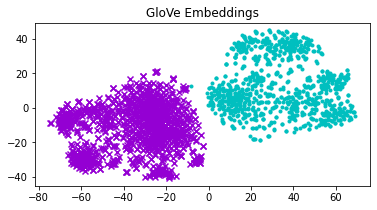

In [39]:
#Getting the clusters for the original embeddings
glove_plot= cluster_and_visualize(male_words + female_words, 
                      extract_vectors(male_words + female_words, vectors_limited, word2idx_limited), 
                          'GloVe Embeddings', 
                      random_state, 
                      tsne_random_state,
                      y_true)

Alignment 0.644


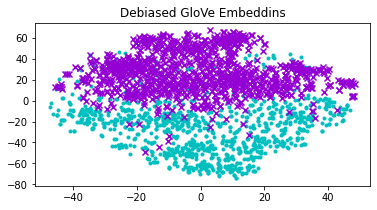

In [40]:
#Getting the clusters for the debiased embeddings
cluster_and_visualize(male_words + female_words, 
                      extract_vectors(male_words + female_words, debiased_vectors_limited, debiased_word2idx_limited), 
                          'Debiased GloVe Embeddins',
                      random_state, 
                      tsne_random_state, 
                      y_true)

As the plots show, the original embeddings are biased: neutral words encode gender information in such a way that we get two very distinct and separated clusters of words. 

Our results show that the Double-Hard Debias algorithm manages to produce GloVe embeddings that encode less gender information, which results in the mixing up of the two groups in the plot.

Our result is still not perfect: it gets an allignment of 0.64 (close to 0.5, but not exactly) and the groups are still not perfectly mixed up. The authors of the original paper got a better result, as shown in the next picture:

<img src='https://drive.google.com/uc?id=1600VcvK65UnSq2LHbyOTBCyeMWZlEfQN'>

The difference in our results might be due to the different decisions in the processing of the embeddings.

To get a sense of the difference we could maybe use the WEAT score, which we didn't get to in this tutorial. Word Embeddings Association Test is a measure developed by Caliskan et al. that compares the association of female and male words with some target words. It could be a good way to understand why our results are so different from the ones presented in the paper. 


## Machine translation from scratch

For the translation task, we tried a sequence to sequence approach inspired by Assignment 3 of the Deep Learning course at Hertie School. We did a few modifications to fit our task: 
We adapted it to fit a English-Spanish translation task.
We enlarged the dataset used in the homework (point 8) to include sentences of the UN dataset related to professions.
We changed the preprocessing functions for our model to be able to include sentences with up to 30 words and starting with expressions different from “I am”, “You are”, etc. 
With this we got 242,643 sentence pairs that when filtered amounted to 72.476 words in English and 94.148 in Spanish.
Since the task was considerably more complex, we used an “LSTM” encoder and an “LSTM” decoder with 2 hidden layers and a dropout rate of 0.2.
We trained with GloVe embeddings downloaded from Gensim and with our own debiased embeddings. 
Although we ran our models on GPU and in two parallel colab notebooks, we didn’t get the results we were expecting. After more than 12 hours of training time, our error rate for both models was still at 3.0 (here [texto del enlace](https://colab.research.google.com/drive/1g7SQwvyI86pca139fQqMYSb6FIX8nZkq?usp=sharing) is the training for the debiased embeddings model) and the sentences were not completely translated. Because of that, we couldn’t then evaluate our translation models as planned. This could be one of the tasks to try in the future. 

<a name="results-and-discussion"></a>
# Results & Discussion

In this section, describe and contextualize the results shown in the tutorial. Briefly describe the performance metrics and cross validation techniques used.

In [ ]:
# Insert code here. Feel free to break this up into several code
# cells, interleaved with explanatory text.

## Limitations
**Embeddings**

Even though we got a very decent result in our debiasing of the embeddings, the *Double-Hard Debiasing Algorithm* has some limitations:
- Since it is a hard algorithm it completely removes the gender projection of neutral words, this means that information is lost from the embeddings and it could potentially affect other tasks. 
- Also, by removing the frequency features, our debiased embeddings cannot be used anymore in analytical tasks that are based on the frequencies of usage of words, as Twitter data analysis for instance. 
- Because of the nature of the embeddings, we have information about their closeness to other words, but not of their meanings. This is one of the reasons that we didn't take "man" as a gendered word: since it is used as proxy for "humanity" or of "males", it could bias our results. However, we don't know if any other word was also used to signal a different meaning. 

As for our approach in this tutorial, there are also limitations: 
- We didn't equalize the gendered-words in the embeddings, this means that words such as grandmother and grandfather still have different norms in our embeddings, which can bias some tasks. Equalizing them can solve this issue, while providing a good opportunity to differentiate between words that are neutral and words that require information of their gender. 
- We have a measure of the aligment of our embeddings with respect to gender neutrality, but not of their distribution with respect to gender atributes sets. For this, it would be good to calculate the WEAT scores and to compare them with the authors results. 

**Translation Task**
- Very hard to get a decent model, that could pick all the gendered nuances of complex sentences. We tried the model that we used in class, with a larger and more complex data set, but after more than 12 hours of training we still didn't get decent translations. 

 

## Next Steps

*   Get your hands dirty! Take this notebook, copy it and try to run everything yourself.
*   As for the embeddings, you could also try using word2vec embeddings and comparing the results to the ones we got with GloVe.
*   You could also try equalizing gendered words and WEAT as a measure to compare your results to ours and to the original authors'.


<a name="references"></a>
# References




**Debiasing Embeddings**
- Hassiah, K. (2018). Testing Double Hard Debias Algorithm; https://colab.research.google.com/github/hassiahk/Double-Hard-Debias/blob/main/notebooks/GloVe_Double_Hard_Debias.ipynb#scrollTo=cWmFR9KbPnCt
- jmyao17. Operations on word vectors.
- Tolga Bolukbasi, Kai-Wei Chang, James Y. Zou, Venkatesh Saligrama, and Adam Tauman Kalai. 2016. Man is to computer programmer as woman is to homemaker? debiasing word embeddings. In NIPS.
- Wang, T., Lin, X. V., Rajani, N. F., Ordonez, V., & Xiong, C. (2019). DOUBLE-HARD DEBIASING: TAILORING WORD EMBEDDINGS FOR GENDER BIAS MITIGATION.

## Acknowledgement

These guidelines are heavily based on the Climate Change AI template for the for the tutorials track at the [NeurIPS 2021 Workshop on Tackling Climate Change with Machine Learning](https://www.climatechange.ai/events/neurips2021). 